In [1]:
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
%matplotlib inline

In [2]:
# guess a binary number in one shot
guess_number = '10011010'

In [3]:
def create_gates(circuit, number, num_qbits):
    for idx, digit in enumerate(number):
        if digit == '1':
            circuit.cx(idx, num_qbits - 1)

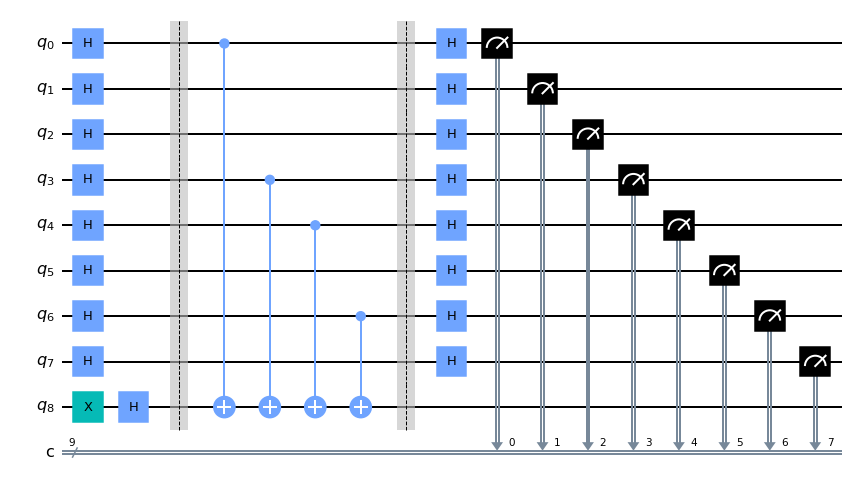

In [4]:
n_qubits = 9
qrange = range(n_qubits)

qc = QuantumCircuit(n_qubits, n_qubits)
qc.x(n_qubits - 1)
qc.h(qrange)
#qc.z(n_qubits - 1) # or use z-gate
qc.barrier()
create_gates(qc, guess_number, n_qubits)
qc.barrier()
qc.h(range(n_qubits - 1))
qc.measure(range(n_qubits - 1), range(n_qubits - 1))

qc.draw(output="mpl")

In [5]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [6]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

{'001011001': 1}


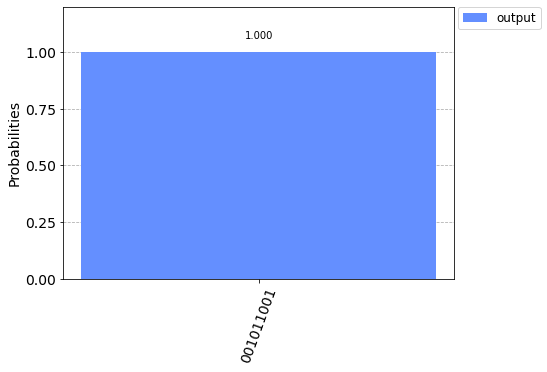

In [7]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


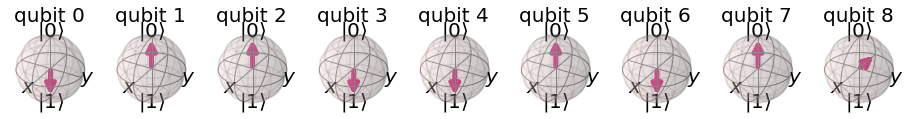

In [8]:
plot_bloch_multivector(sim_state_vector)

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


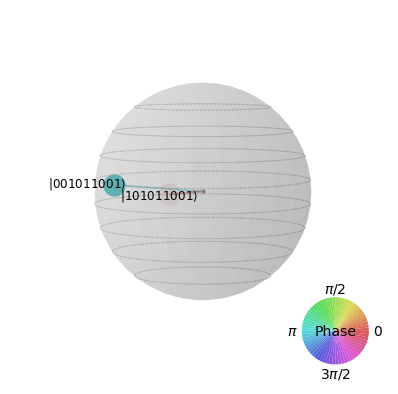

In [9]:
plot_state_qsphere(sim_state_vector)

In [10]:
import qiskit.quantum_info as qi
rho_H = qi.DensityMatrix(sim_state_vector)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>